<a href="https://colab.research.google.com/github/TrSaleMane/deep-learning-from-step-by-step/blob/main/vol09_improve_accuracy/vol09_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vol.9：精度を上げるための工夫

MNIST の精度を高めるための改善テクニックを紹介します。


ライブラリ読み込み

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

データ読み込み

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("\n")
print("学習データ数：", len(train_dataset))
print("テストデータ数：", len(test_dataset))



学習データ数： 60000
テストデータ数： 10000


改善ポイント①：学習率を変えてみる

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()
criterion = nn.CrossEntropyLoss()

# 学習率を変えて試す
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

改善ポイント②：層を増やす（DeepNN）

In [5]:
class DeepNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

改善ポイント③：Dropout を入れる

In [6]:
class DropoutNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

改善ポイント④：バッチサイズを変えてみる

In [7]:
train_loader_128 = DataLoader(train_dataset, batch_size=128, shuffle=True)
train_loader_32  = DataLoader(train_dataset, batch_size=32, shuffle=True)

改善ポイント⑤：Weight Decay（正則化）

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

学習ループ

以下の3つのモデルを、1つずつ切り替えて学習させてみて、精度の違いを比較してみてください。

In [17]:
def train(model, train_loader, optimizer, criterion, epochs=3):
    loss_list = []
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
    return loss_list

model = SimpleNN()
#model = DeepNN()
#model = DropoutNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_list = train(model, train_loader, optimizer, criterion)

Epoch 1, Loss: 0.4518
Epoch 2, Loss: 0.0192
Epoch 3, Loss: 0.0832


精度の確認

In [18]:
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for x, y in test_loader:
        out = model(x)
        pred = out.argmax(dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)

print("Accuracy:", correct / total)

Accuracy: 0.9738


比較結果はいかがだったでしょうか？？

それぞれでAccuracyの値はあまり変わらないと思います。

Dropout は精度が上がるというより過学習を抑えて、テスト精度が安定する
という効果があります。

- SimpleNN → 訓練精度は高いがテスト精度が少し低い
- DropoutNN → 訓練精度は下がるがテスト精度が安定する

小規模な学習モデルでは、有効性がはっきりしないかもしれませんが、

 - 大規模モデルでは「改善テクニックの選択」が学習効率を左右する
 - 大規模モデルでは「過学習対策」が必須になる


ということは、覚えておいてもらったほうがいいと思います。


loss の推移を可視化

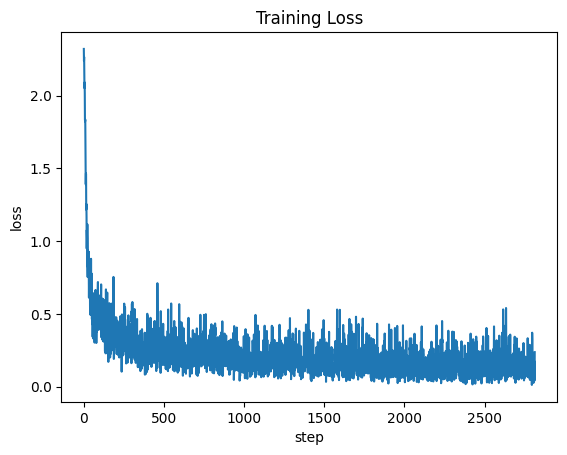

In [16]:
plt.plot(loss_list)
plt.title("Training Loss")
plt.xlabel("step")
plt.ylabel("loss")
plt.show()

---

## ▶ 次のステップ

ここまでで、MNIST の精度を上げるための

- 学習率の調整  
- 層を増やす  
- Dropout  
- バッチサイズの調整  
- Weight Decay  

といった改善テクニックを紹介しました。

次の **Vol.10** では、次の記事では、「まとめと次のステップ」です。

次シリーズの内容も紹介する予定です。